In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [126]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


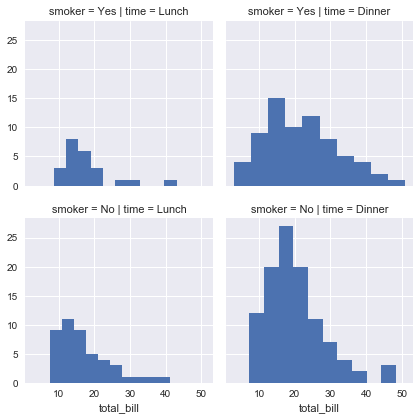

In [127]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(plt.hist, "total_bill")

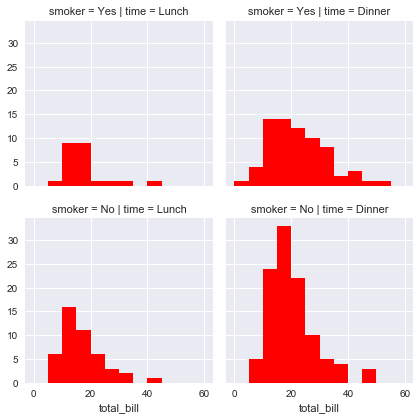

In [128]:
bins = np.arange(0,65,5)
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(plt.hist, "total_bill", bins=bins, color="r")

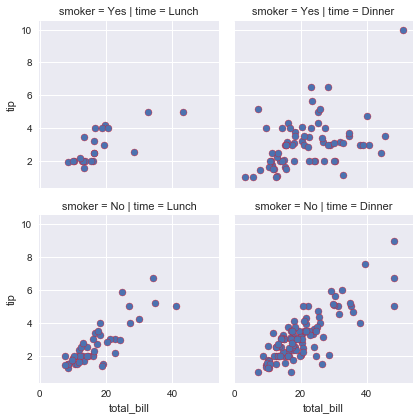

In [129]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(plt.scatter, "total_bill", "tip", edgecolor="r")

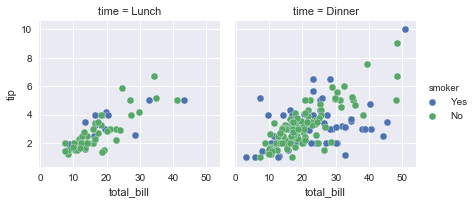

In [130]:
g = sns.FacetGrid(tips, col="time", hue="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")
g.add_legend()

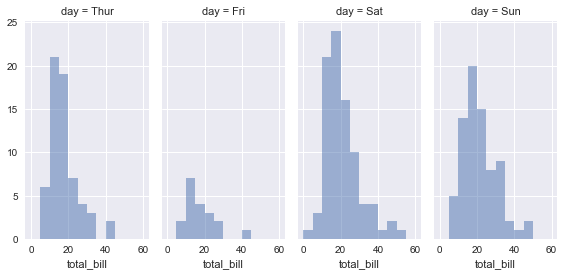

In [131]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g = g.map(plt.hist, "total_bill", bins=bins, alpha=0.5)

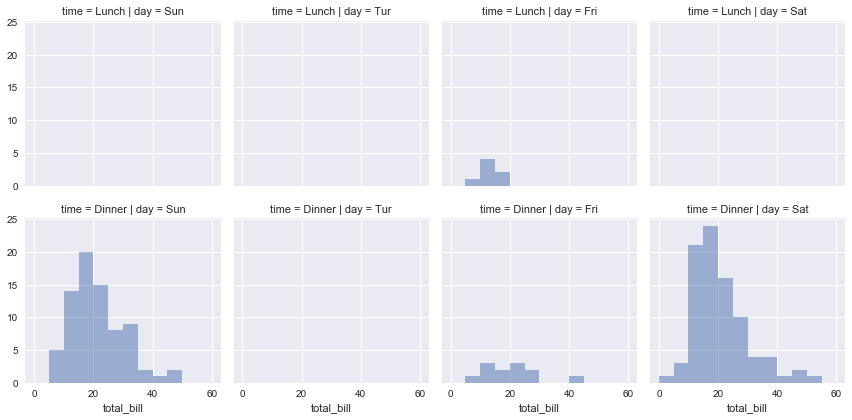

In [132]:
g = sns.FacetGrid(tips, row="time", col="day", col_order=["Sun","Tur","Fri","Sat"],size=3)
g = g.map(plt.hist, "total_bill", bins=bins, alpha=0.5)

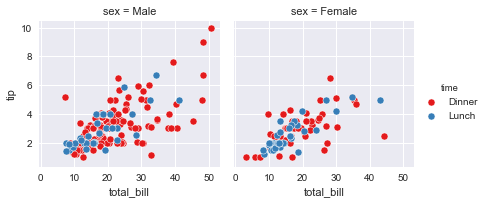

In [133]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1", hue_order=["Dinner", "Lunch"])
g = g.map(plt.scatter, "total_bill", "tip", **kws)
g.add_legend()

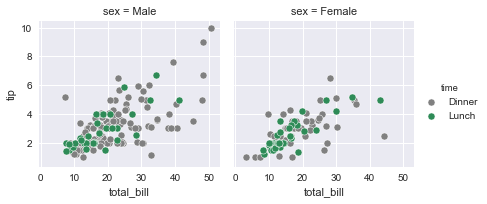

In [134]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal, hue_order=["Dinner","Lunch"])
g = g.map(plt.scatter, "total_bill", "tip", **kws)
g.add_legend()

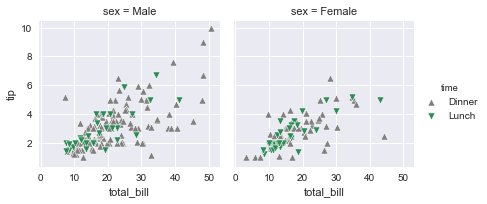

In [135]:
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal, hue_order=["Dinner","Lunch"], hue_kws=dict(marker=["^","v"]))
g= g.map(plt.scatter, "total_bill", "tip", **kws)
g.add_legend()

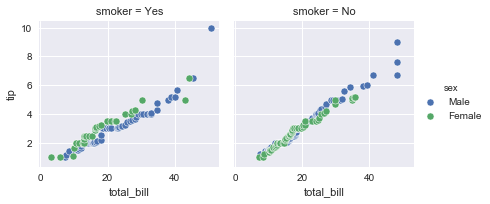

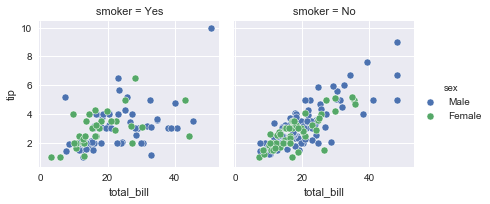

In [136]:
from scipy import stats

def qqplot(x, y, **kwargs):
    _x, xr = stats.probplot(x, fit=False)  # X(total_bill) is sorted as a result
    _y, yr = stats.probplot(y, fit=False)  # Y(tip) is sorted as a result 
    plt.scatter( xr, yr, **kwargs ) 

# scatter plot of sorted values (what means this?)
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g = g.map(qqplot, "total_bill", "tip", **kws)
g.add_legend()

# plain scatter plot
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g = g.map(plt.scatter, "total_bill", "tip", **kws)
g.add_legend()

walk               A         B         C         D
date                                              
2015-01-01  0.234259  0.593899 -0.001218  0.271627
2015-01-02  1.187289 -0.664155  0.279463  0.281883
2015-01-03 -0.660616 -0.023330 -0.145273  0.652345
2015-01-04 -0.271556 -0.166648  0.144454 -0.186297
2015-01-05  0.763201  0.191667 -0.846921 -1.106252
2015-01-06  0.296074  1.764882 -0.345431 -1.225549
2015-01-07  0.308265 -1.109183 -1.075051  0.254293
2015-01-08  0.653608 -0.790360  0.798614  0.004053
2015-01-09  0.749341  1.152170 -0.401821 -0.185290
2015-01-10 -0.477440 -0.234135  0.077858 -1.673168
walk               A         B         C         D
date                                              
2015-01-01  0.234259  0.593899 -0.001218  0.271627
2015-01-02  1.421548 -0.070256  0.278245  0.553510
2015-01-03  0.760932 -0.093586  0.132972  1.205855
2015-01-04  0.489376 -0.260234  0.277425  1.019558
2015-01-05  1.252577 -0.068568 -0.569496 -0.086693
2015-01-06  1.548652  1.696314 

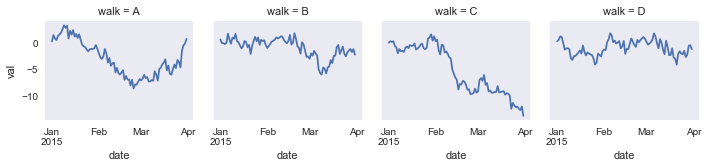

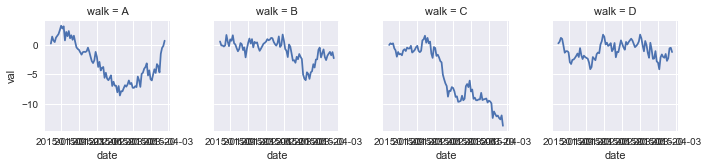

In [137]:
import pandas as pd

cols = pd.Series(list("ABCD"), name="walk")
indx = pd.date_range("2015-01-01", "2015-03-31", name="date")
data = np.random.randn(90,4)

df = pd.DataFrame(data, columns=cols, index=indx)
print(df.head(10))

df = df.cumsum(axis=0)
print(df.head(10))

df = df.stack()
df = df.reset_index(name="val")
print(df.head(10))

def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
                      
g = sns.FacetGrid(df, col="walk", size=2.5)
g = g.map_dataframe(dateplot, "date", "val")

g = sns.FacetGrid(df, col="walk", size=2.5)
g = g.map( plt.plot, "date", "val" ) # plain plt.plot() as reference 

In [138]:
m = map(ord, "xxxx")
sum(m)

480